In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# Let's deal with experiment A first:
from utils.data_loader import load_dataset

try:
   del X_train_A, y_train_A
   del X_test_A, y_test_A
   print('Clear previously loaded data.')
except:
   pass

X_train_A, y_train_A, X_test_A, y_test_A = load_dataset('./dataset/A/train_data.csv', './dataset/A/test_data.csv')

print('Experiment A - Training data shape:', X_train_A.shape)
print('Experiment A - Training labels shape:', y_train_A.shape)
print('Experiment A - Test data shape:', X_test_A.shape)
print('Experiment A - Test labels shape:', y_test_A.shape)

Clear previously loaded data.
Experiment A - Training data shape: (567, 8)
Experiment A - Training labels shape: (567,)
Experiment A - Test data shape: (201, 8)
Experiment A - Test labels shape: (201,)


In [43]:
from classifiers.KNearestNeighbor import KNearestNeighbor

knn_classifier = KNearestNeighbor()     # Create a knn classifier instance
# knn_classifier.train(X_train_A, y_train_A)

In [44]:
# Cross-validation to find the best k for experiment A:
num_folds = 5
k_choices = np.arange(1, 51, 2)
X_train_folds = []
y_train_folds = []

num_train = X_train_A.shape[0]
Xy_train = np.concatenate([X_train_A, np.reshape(y_train_A, (num_train, 1))], axis=1)
Xy_train_folds = np.array_split(Xy_train, num_folds, axis=0)
for fold in Xy_train_folds:
    X_train_folds.append(fold[:, :-1])
    y_train_folds.append(fold[:, -1].astype(int))

k_to_accuracies = {}

for k in k_choices:
    accuracies = []
    for i in range(num_folds):
        knn_classifier.train(np.concatenate([fold for idx, fold in enumerate(X_train_folds) if idx!=i], axis=0), np.concatenate([fold for idx, fold in enumerate(y_train_folds) if idx!=i], axis=0))
        y_validation_pred = knn_classifier.predict(X_train_folds[i], k)
        num_correct = np.sum(y_validation_pred==y_train_folds[i])
        accuracies.append(float(num_correct) / X_train_folds[i].shape[0])
    k_to_accuracies[k] = accuracies


# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %3d, accuracy = %f' % (k, accuracy), end=" | ")
    print()

k =   1, accuracy = 0.657895 | k =   1, accuracy = 0.657895 | k =   1, accuracy = 0.584071 | k =   1, accuracy = 0.707965 | k =   1, accuracy = 0.716814 | 
k =   3, accuracy = 0.675439 | k =   3, accuracy = 0.710526 | k =   3, accuracy = 0.663717 | k =   3, accuracy = 0.734513 | k =   3, accuracy = 0.707965 | 
k =   5, accuracy = 0.701754 | k =   5, accuracy = 0.728070 | k =   5, accuracy = 0.601770 | k =   5, accuracy = 0.796460 | k =   5, accuracy = 0.752212 | 
k =   7, accuracy = 0.736842 | k =   7, accuracy = 0.719298 | k =   7, accuracy = 0.637168 | k =   7, accuracy = 0.796460 | k =   7, accuracy = 0.787611 | 
k =   9, accuracy = 0.763158 | k =   9, accuracy = 0.710526 | k =   9, accuracy = 0.610619 | k =   9, accuracy = 0.778761 | k =   9, accuracy = 0.787611 | 
k =  11, accuracy = 0.736842 | k =  11, accuracy = 0.710526 | k =  11, accuracy = 0.610619 | k =  11, accuracy = 0.787611 | k =  11, accuracy = 0.769912 | 
k =  13, accuracy = 0.719298 | k =  13, accuracy = 0.684211 | k 

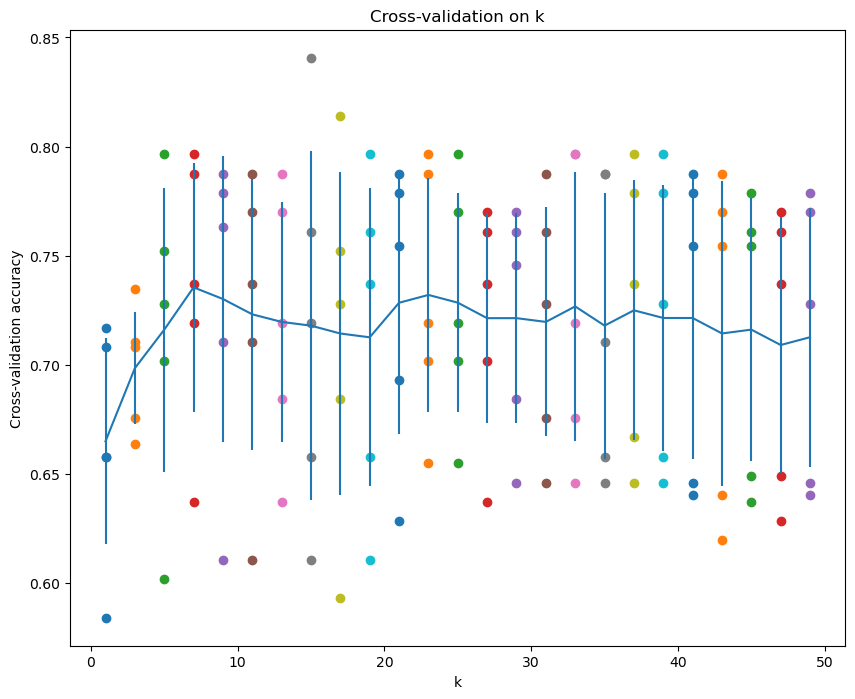

In [45]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [46]:
# Based on the cross-validation results above, choose the best value for k,
# retrain the classifier using all the training data, and test it on the test
best_k = k_choices[accuracies_mean.argmax()]; print('best k for experiment A: %d' % best_k)

knn_classifier = KNearestNeighbor()
knn_classifier.train(X_train_A, y_train_A)
y_test_pred = knn_classifier.predict(X_test_A, k=best_k)

# Compute and display the accuracy
num_test = y_test_A.shape[0]
num_correct = np.sum(y_test_pred == y_test_A)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

best k for experiment A: 7
Got 147 / 201 correct => accuracy: 0.731343


In [47]:
# Experiment B:
try:
   del X_train_B, y_train_B
   del X_test_B, y_test_B
   print('Clear previously loaded data.')
except:
   pass

X_train_B, y_train_B, X_test_B, y_test_B = load_dataset('./dataset/B/train_data.csv', './dataset/B/test_data.csv')
num_test = y_test_B.shape[0]

print('Experiment B - Training data shape:', X_train_B.shape)
print('Experiment B - Training labels shape:', y_train_B.shape)
print('Experiment B - Test data shape:', X_test_B.shape)
print('Experiment B - Test labels shape:', y_test_B.shape)

Clear previously loaded data.
Experiment B - Training data shape: (668, 8)
Experiment B - Training labels shape: (668,)
Experiment B - Test data shape: (100, 8)
Experiment B - Test labels shape: (100,)


In [ ]:
# Cross-validation to find the best k for experiment B:
num_folds = 5
k_choices = np.arange(1, 51, 2)

X_train_folds = []
y_train_folds = []

num_train = X_train_B.shape[0]
Xy_train = np.concatenate([X_train_B, np.reshape(y_train_B, (num_train, 1))], axis=1)
Xy_train_folds = np.array_split(Xy_train, num_folds, axis=0)
for fold in Xy_train_folds:
    X_train_folds.append(fold[:, :-1])
    y_train_folds.append(fold[:, -1].astype(int))

k_to_accuracies = {}

for k in k_choices:
    accuracies = []
    for i in range(num_folds):
        knn_classifier.train(np.concatenate([fold for idx, fold in enumerate(X_train_folds) if idx!=i], axis=0), np.concatenate([fold for idx, fold in enumerate(y_train_folds) if idx!=i], axis=0))
        y_validation_pred = knn_classifier.predict(X_train_folds[i], k)
        num_correct = np.sum(y_validation_pred==y_train_folds[i])
        accuracies.append(float(num_correct) / X_train_folds[i].shape[0])
    k_to_accuracies[k] = accuracies


# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %3d, accuracy = %f' % (k, accuracy), end=" | ")
    print()

k =   1, accuracy = 0.597015 | k =   1, accuracy = 0.738806 | k =   1, accuracy = 0.686567 | k =   1, accuracy = 0.578947 | k =   1, accuracy = 0.684211 | 
k =   3, accuracy = 0.641791 | k =   3, accuracy = 0.768657 | k =   3, accuracy = 0.738806 | k =   3, accuracy = 0.624060 | k =   3, accuracy = 0.699248 | 
k =   5, accuracy = 0.656716 | k =   5, accuracy = 0.768657 | k =   5, accuracy = 0.746269 | k =   5, accuracy = 0.661654 | k =   5, accuracy = 0.699248 | 
k =   7, accuracy = 0.656716 | k =   7, accuracy = 0.805970 | k =   7, accuracy = 0.761194 | k =   7, accuracy = 0.669173 | k =   7, accuracy = 0.714286 | 
k =   9, accuracy = 0.656716 | k =   9, accuracy = 0.791045 | k =   9, accuracy = 0.746269 | k =   9, accuracy = 0.714286 | k =   9, accuracy = 0.729323 | 
k =  11, accuracy = 0.649254 | k =  11, accuracy = 0.798507 | k =  11, accuracy = 0.791045 | k =  11, accuracy = 0.714286 | k =  11, accuracy = 0.751880 | 
k =  13, accuracy = 0.641791 | k =  13, accuracy = 0.798507 | k 

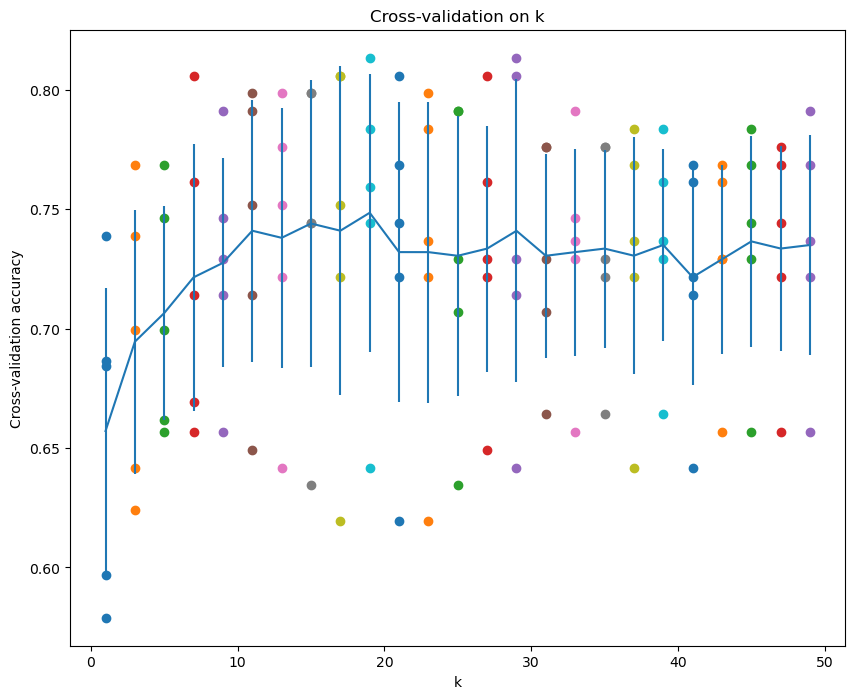

In [49]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [50]:
# Based on the cross-validation results above, choose the best value for k,
# retrain the classifier using all the training data, and test it on the test
best_k = k_choices[accuracies_mean.argmax()]; print('best k for experiment B: %d' % best_k)

knn_classifier = KNearestNeighbor()
knn_classifier.train(X_train_B, y_train_B)
y_test_pred = knn_classifier.predict(X_test_B, k=best_k)

# Compute and display the accuracy
num_test = y_test_B.shape[0]
num_correct = np.sum(y_test_pred == y_test_B)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

best k for experiment B: 19
Got 72 / 100 correct => accuracy: 0.720000
